In [3]:
# Q1 - Download the one-year historical daily data for The Apple Inc. 
# (AAPL) fromYahoo Finance. Save the data as a ‘csv’ file.

import pandas as pd # Imports panda with the chosen file
df = pd.read_csv('AAPL.csv') # pd.read_csv reads the file, and plots it in Python file
df.head() # Only shows the top of the table

,Date,Open,High,Low,Close,Adj Close,Volume
0,03/03/2022,168.470001,168.910004,165.550003,166.229996,165.229095,76678400
1,04/03/2022,164.490005,165.550003,162.100006,163.169998,162.187515,83737200
2,07/03/2022,163.360001,165.020004,159.039993,159.300003,158.340836,96418800
3,08/03/2022,158.820007,162.880005,155.800003,157.440002,156.492020,131148300
4,09/03/2022,161.479996,163.410004,159.410004,162.949997,161.968857,91454900


In [4]:
df.tail() # Only shows the bottom of the table

,Date,Open,High,Low,Close,Adj Close,Volume
246,24/02/2023,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
247,27/02/2023,147.710007,149.169998,147.449997,147.919998,147.919998,44998500
248,28/02/2023,147.050003,149.080002,146.830002,147.410004,147.410004,50547000
249,01/03/2023,146.830002,147.229996,145.009995,145.309998,145.309998,55479000
250,02/03/2023,144.380005,146.710007,143.899994,145.910004,145.910004,52238100


In [5]:
# Q2 - Calculate the normal daily returns and log-returns by using ‘numpy’. 
# Then provide the annualized return and volatility of AAPL

import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.018408259150726514,
 -0.023717479116687833,
 -0.011676179352747635,
 0.03499754811778912,
 -0.027186220126255538]

In [6]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.018579799588565805,
 -0.024003266338709337,
 -0.011744881242226307,
 0.03439905774620668,
 -0.02756260270429254]

In [7]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is -0.06269231 and its annulized volatility is 0.35194247


In [8]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is -0.12434294 and its annulized volatility is 0.35175394


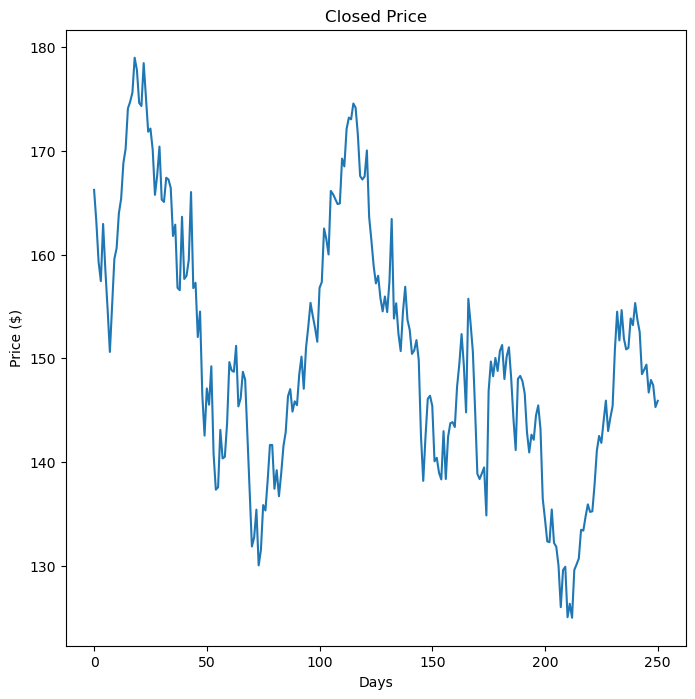

In [16]:
# Q3 - Plot the daily closed price by using ‘matplotlib’

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.plot(df['Close'])
plt.xlabel('Days') # Creates a name for the X-axis
plt.ylabel('Price ($)') # Creates a name for the Y-axis
plt.title('Closed Price'); # Creates a title to the figure

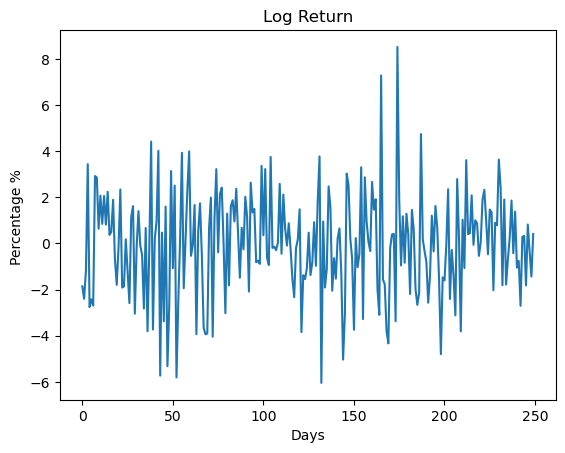

In [10]:
# Q4 - Plot the daily log return by using ‘matplotlib’

fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

/var/folders/ld/6dz5k2qx3t7bb6dmg2c3pf6c0000gn/T/ipykernel_8790/4229064051.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


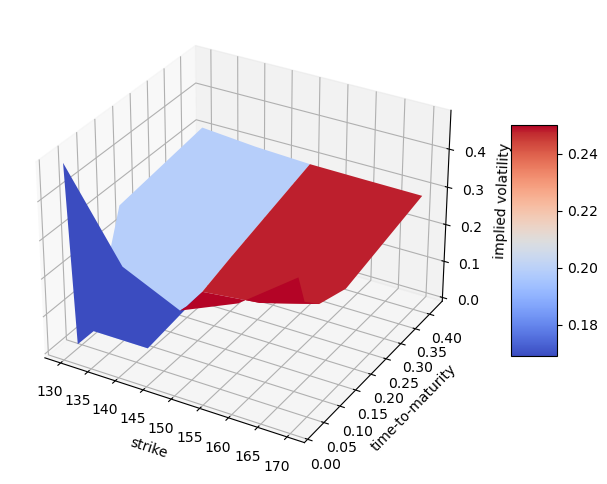

In [11]:
# Q6 - Plot a 3D surface for the implied vol of AAPL. Compare the value you getfrom the Q2. Make some comments.

strike = np.array([130, 140, 150, 160, 170])
ttm = np.array([1/52, 2/52, 4/52, 3/12, 6/12])
strike, ttm = np.meshgrid(strike, ttm)
v1 = np.array([0.4901, 0.2682, 0.1995, 0.2637, 0.3742])
v2 = np.array([0.0009, 0.1912, 0.1954, 0.2296, 0.2981])
v3 = np.array([0.0000, 0.0000, 0.1976, 0.2139, 0.2568]) # These numbers are collected from the Excel Implied Vol
v4 = np.array([0.2752, 0.2370, 0.2223, 0.2214, 0.2305])
v5 = np.array([0.3093, 0.2964, 0.2891, 0.2872, 0.2858])
iv = np.array([v1, v2, v3, v4, v5])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

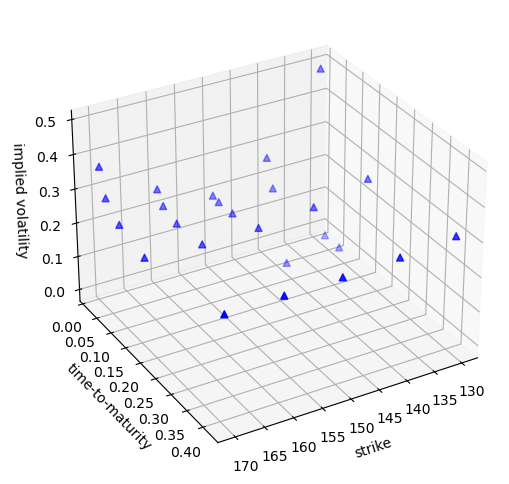

In [12]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25, c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');